# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
dataset = pd.read_csv("types_statistic_sum.csv")

# Visualization

In [3]:
dataset

,Graph Name,try-catch existence,variables modification state,nesting structure,if-else existence,code with comment,sequence,loop,model prediction
0,Scalabrino15.java,1,0,1,1,0,0,1,unreadable
1,Scalabrino28.java,0,1,0,1,0,0,0,unreadable
2,Scalabrino34.java,0,1,1,1,0,0,1,unreadable
3,Scalabrino36.java,0,0,0,1,0,1,0,readable
4,Scalabrino43.java,0,0,1,1,0,0,0,unreadable
...,...,...,...,...,...,...,...,...,...
73,Scalabrino160.java,1,1,1,0,0,0,0,readable
74,Scalabrino164.java,1,0,1,1,1,0,0,readable
75,Scalabrino168.java,1,1,1,0,0,1,0,readable
76,Scalabrino169.java,0,1,1,1,0,0,0,readable


In [4]:
# split data into readable and unreadable sets (according to model prediction)
unreadable_set = dataset.loc[dataset["model prediction"] == "unreadable"]
readable_set = dataset.loc[dataset["model prediction"] == "readable"]

In [5]:
unreadable_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 66
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Graph Name                    33 non-null     object
 1   try-catch existence           33 non-null     int64 
 2   variables modification state  33 non-null     int64 
 3   nesting structure             33 non-null     int64 
 4   if-else existence             33 non-null     int64 
 5   code with comment             33 non-null     int64 
 6   sequence                      33 non-null     int64 
 7   loop                          33 non-null     int64 
 8   model prediction              33 non-null     object
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


In [6]:
readable_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 3 to 77
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Graph Name                    45 non-null     object
 1   try-catch existence           45 non-null     int64 
 2   variables modification state  45 non-null     int64 
 3   nesting structure             45 non-null     int64 
 4   if-else existence             45 non-null     int64 
 5   code with comment             45 non-null     int64 
 6   sequence                      45 non-null     int64 
 7   loop                          45 non-null     int64 
 8   model prediction              45 non-null     object
dtypes: int64(7), object(2)
memory usage: 3.5+ KB


In [7]:
# count types in predicted unreadable set
types = ['try-catch existence', 'variables modification state', 'nesting structure', 
        'if-else existence', 'code with comment', 'sequence', 'loop']
types_count = ['T-C-E', 'V-M-S', 'N-S', 'I-E-E', 'C-C', 'S', 'L']
readable_types_count = []
unreadable_types_count = []

# unreadable set count
for type_name in types:
    count_value = unreadable_set[type_name].value_counts().get(1, 0)
    unreadable_types_count.append(count_value)
    
# readable set count
for type_name in types:
    count_value = readable_set[type_name].value_counts().get(1, 0)
    readable_types_count.append(count_value)

In [8]:
readable_types_count

[12, 13, 18, 20, 21, 23, 4]

In [9]:
unreadable_types_count

[1, 13, 13, 18, 1, 12, 5]

In [10]:
types

['try-catch existence',
 'variables modification state',
 'nesting structure',
 'if-else existence',
 'code with comment',
 'sequence',
 'loop']

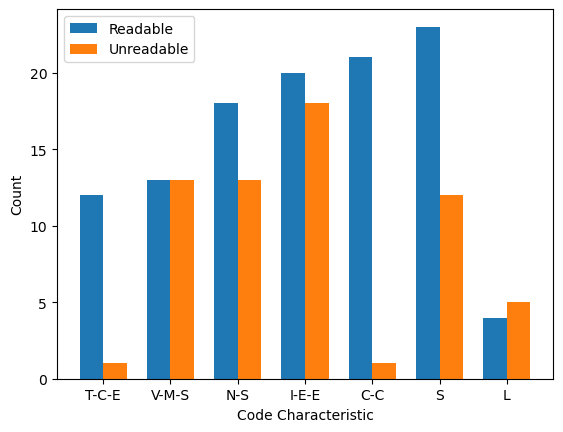

In [11]:
bar_width = 0.35

# 生成x轴的位置
x = range(len(types_count))

# 绘制柱状图，每个柱子包含两个类的数据
plt.bar(x, readable_types_count, width=bar_width, label='Readable')
plt.bar([p + bar_width for p in x], unreadable_types_count, width=bar_width, label='Unreadable')

# 设置x轴标签
plt.xlabel('Code Characteristic')
# 设置y轴标签
plt.ylabel('Count')
# 设置x轴刻度标签
plt.xticks([p + bar_width/2 for p in x], types_count)
# 添加图例
plt.legend()
# 显示柱状图
plt.show()

In [12]:
readable_types_count.sort(reverse=True) # sort

In [13]:
readable_types_count

[23, 21, 20, 18, 13, 12, 4]

In [14]:
unreadable_types_count.sort(reverse=True) # sort

In [15]:
unreadable_types_count

[18, 13, 13, 12, 5, 1, 1]

In [16]:
readable_types = [
    'S',
    'C-C',
    'I-E-E',
    'N-S',
    'V-M-S',
    'T-C-E',
    'L'
]
unreadable_types = [
    'I-E-E',
    'N-S',
    'V-M-S',
    'S',
    'L',
    'T-C-E',
    'C-C'
]

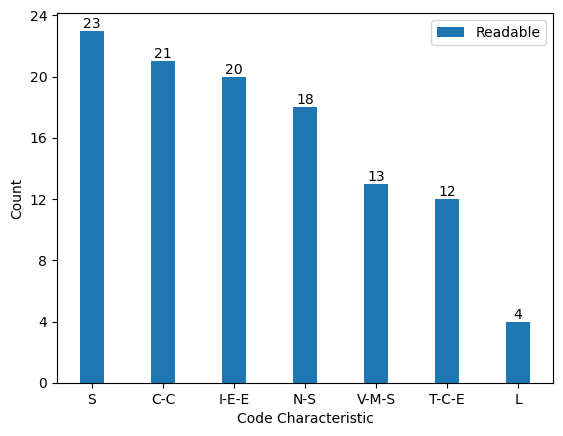

In [19]:
# draw readable bar chart
bar_width = 0.35

# 绘制柱状图，每个柱子包含两个类的数据
plt.bar(readable_types, readable_types_count, width=bar_width, label='Readable')

for i, v in enumerate(readable_types_count):
    plt.text(i, v + 0.2, str(v), ha='center')
# 设置x轴标签
plt.xlabel('Code Characteristic')
# 设置y轴标签
plt.ylabel('Count')
# 设置刻度
plt.yticks([0, 4, 8, 12, 16, 20, 24])
# 添加图例
plt.legend()
# 显示柱状图
plt.show()

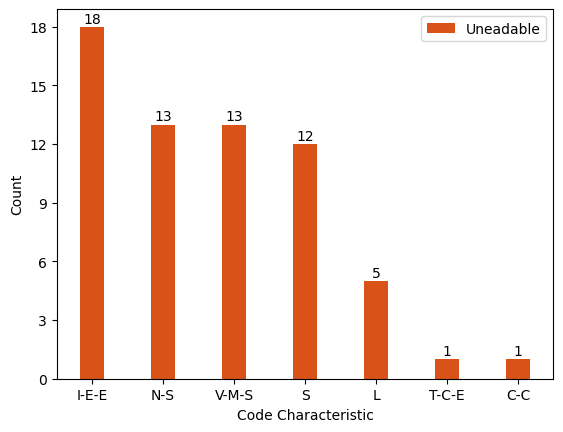

In [20]:
# draw unreadable bar chart
bar_width = 0.35

# 绘制柱状图，每个柱子包含两个类的数据
plt.bar(unreadable_types, unreadable_types_count, width=bar_width, label='Uneadable', color='#D95319')

for i, v in enumerate(unreadable_types_count):
    plt.text(i, v + 0.2, str(v), ha='center')
# 设置x轴标签
plt.xlabel('Code Characteristic')
# 设置y轴标签
plt.ylabel('Count')
# 设置刻度
plt.yticks([0, 3, 6, 9, 12, 15, 18])
# 添加图例
plt.legend()
# 显示柱状图
plt.show()